<a href="https://colab.research.google.com/github/JKSWK/MARKET_ML_PREDICTION/blob/main/neural_prophet_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! pip install neuralprophet[live]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from neuralprophet import NeuralProphet
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_percentage_error

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JKSWK/MARKET_ML_PREDICTION/main/merged_data.csv").dropna()
df.head()

Data  COPPER_d    DAX_d     DJI_d  EURJPY_d  EURUSD_d  GBPUSD_d  \
0  2013-05-08    3.3710  8249.71  15105.12    130.19    1.3159    1.5538   
1  2013-05-09    3.3415  8262.55  15082.62    131.26    1.3043    1.5443   
2  2013-05-10    3.3560  8278.59  15118.49    131.90    1.2984    1.5358   
3  2013-05-13    3.3620  8279.29  15091.68    132.09    1.2981    1.5301   
4  2013-05-14    3.2905  8339.11  15215.25    132.24    1.2931    1.5217   

   GERMANY10B_d  GLOBAL_ENERGY_d  GLOBAL_FINANCE_d  ...  SP500_d  SPENERGY_d  \
0         1.271          29.5355           41.5838  ...  1632.69      810.68   
1         1.273          29.4009           41.1385  ...  1626.67      808.78   
2         1.380          29.2634           41.2667  ...  1633.70      805.26   
3         1.356          29.2222           41.3137  ...  1633.77      804.97   
4         1.376          29.4726           41.5838  ...  1650.34      815.62   

   SPTECH_d  SPVIX_d  USA10B_d  USA30B_d  USDCHF_d  USDJPY_d  WHEAT_d  WIG20_d  
0    316.11    12.66     1.760     2.978    0.9349    98.939    725.5  2367.91  
1    314.70    13.13     1.813     2.997    0.9481   100.630    743.5  2348.95  
2    316.01    12.59     1.900     3.104    0.9574   101.580    724.5  2338.16  
3    314.89    12.55     1.923     3.129    0.9570   101.750    731.0  2354.34  
4    315.90    12.77     1.952     3.163    0.9658   102.270    729.0  2386.81  

[5 rows x 31 columns]

In [4]:
df.describe()

COPPER_d         DAX_d         DJI_d     EURJPY_d     EURUSD_d  \
count  2218.000000   2218.000000   2218.000000  2218.000000  2218.000000   
mean      3.094356  11999.403404  24140.162597   130.054718     1.160668   
std       0.680109   2029.106792   6527.590756     7.946376     0.092670   
min       1.953000   7692.450000  14659.560000   111.036000     0.959570   
25%       2.626625  10318.267500  17779.847500   124.056000     1.100865   
50%       2.988750  12133.520000  24462.320000   130.010500     1.134530   
75%       3.360125  13211.002500  29295.305000   135.680750     1.194112   
max       4.929000  16271.750000  36799.650000   150.237000     1.393000   

          GBPUSD_d  GERMANY10B_d  GLOBAL_ENERGY_d  GLOBAL_FINANCE_d  \
count  2218.000000   2218.000000      2218.000000       2218.000000   
mean      1.377951      0.486220        28.053722         56.812221   
std       0.142146      0.799083         5.444239         11.447780   
min       1.067880     -0.859000        11.499100         37.566600   
25%       1.274795     -0.173500        25.285200         46.440450   
50%       1.329690      0.362500        27.843250         56.504600   
75%       1.494158      0.879750        31.112600         64.601175   
max       1.716400      2.744500        41.980000         83.741300   

       GLOBAL_HEALTHCARE_d  ...     SP500_d   SPENERGY_d     SPTECH_d  \
count          2218.000000  ...  2218.00000  2218.000000  2218.000000   
mean             58.046385  ...  2835.13170   694.056014   798.445532   
std              16.166201  ...   874.00685   155.494403   421.165784   
min              31.442900  ...  1573.09000   244.440000   302.290000   
25%              45.255725  ...  2079.53500   605.947500   427.195000   
50%              53.645650  ...  2690.01000   692.295000   674.240000   
75%              72.057475  ...  3555.78000   806.135000  1218.820000   
max              90.786100  ...  4793.54000  1017.130000  1780.380000   

           SPVIX_d     USA10B_d     USA30B_d     USDCHF_d     USDJPY_d  \
count  2218.000000  2218.000000  2218.000000  2218.000000  2218.000000   
mean     18.043427     2.207838     2.774435     0.954487   112.609229   
std       7.298093     0.741978     0.660395     0.037357    10.082447   
min       9.190000     0.510000     1.031000     0.856300    94.040000   
25%      13.100000     1.724275     2.295175     0.921900   106.400000   
50%      16.080000     2.267650     2.898650     0.961900   110.223250   
75%      21.237500     2.704000     3.166000     0.987440   115.421625   
max      82.690000     4.247000     4.386000     1.030170   150.134000   

           WHEAT_d      WIG20_d  
count  2218.000000  2218.000000  
mean    576.935358  2135.903431  
std     147.791799   282.464705  
min     326.000000  1305.730000  
25%     469.000000  1887.635000  
50%     539.500000  2216.990000  
75%     669.250000  2364.072500  
max    1278.750000  2630.370000  

[8 rows x 30 columns]

<Axes: >

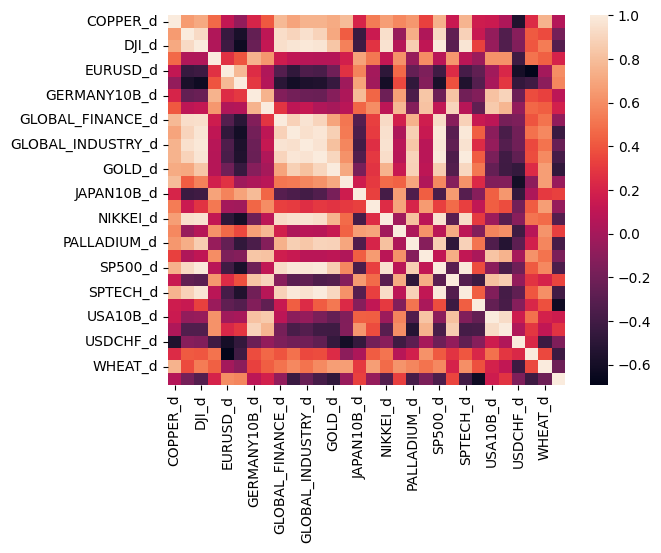

In [5]:
sns.heatmap(data = df.corr())

In [6]:
df = df.rename(columns={"Data":"ds"})
df = df.rename(columns={"WIG20_d":"y"})
df.head()

ds  COPPER_d    DAX_d     DJI_d  EURJPY_d  EURUSD_d  GBPUSD_d  \
0  2013-05-08    3.3710  8249.71  15105.12    130.19    1.3159    1.5538   
1  2013-05-09    3.3415  8262.55  15082.62    131.26    1.3043    1.5443   
2  2013-05-10    3.3560  8278.59  15118.49    131.90    1.2984    1.5358   
3  2013-05-13    3.3620  8279.29  15091.68    132.09    1.2981    1.5301   
4  2013-05-14    3.2905  8339.11  15215.25    132.24    1.2931    1.5217   

   GERMANY10B_d  GLOBAL_ENERGY_d  GLOBAL_FINANCE_d  ...  SP500_d  SPENERGY_d  \
0         1.271          29.5355           41.5838  ...  1632.69      810.68   
1         1.273          29.4009           41.1385  ...  1626.67      808.78   
2         1.380          29.2634           41.2667  ...  1633.70      805.26   
3         1.356          29.2222           41.3137  ...  1633.77      804.97   
4         1.376          29.4726           41.5838  ...  1650.34      815.62   

   SPTECH_d  SPVIX_d  USA10B_d  USA30B_d  USDCHF_d  USDJPY_d  WHEAT_d        y  
0    316.11    12.66     1.760     2.978    0.9349    98.939    725.5  2367.91  
1    314.70    13.13     1.813     2.997    0.9481   100.630    743.5  2348.95  
2    316.01    12.59     1.900     3.104    0.9574   101.580    724.5  2338.16  
3    314.89    12.55     1.923     3.129    0.9570   101.750    731.0  2354.34  
4    315.90    12.77     1.952     3.163    0.9658   102.270    729.0  2386.81  

[5 rows x 31 columns]

In [7]:
df_wig = df[["ds",'EURJPY_d', 'EURUSD_d', 'GBPUSD_d', 'GERMANY10B_d', 'GLOBAL_ENERGY_d', 'JAPAN10B_d', 'NATGAS_d', 
   'OILBRENT_d', 'POLAND10B_d', 'SPENERGY_d', 'USA10B_d', 'USA30B_d', 'USDCHF_d',"y"]]

In [25]:
df_sp = df[['ds','SPVIX_d',
 'USDJPY_d',
 'GOLD_d',
 'PALLADIUM_d',
 'GLOBAL_HEALTHCARE_d',
 'GLOBAL_TECH_d',
 'SPTECH_d',
 'NIKKEI_d',
 'GLOBAL_INDUSTRY_d',
 'DJI_d',
 'SP500_d',
 'DAX_d',
 'GLOBAL_FINANCE_d',
 'IRON_d',
 'COPPER_d',
 'WHEAT_d']]
df_sp['y'] = df_sp['SP500_d']
df_sp = df_sp.drop(columns="SP500_d")

In [26]:
df_sp

ds  SPVIX_d  USDJPY_d   GOLD_d  PALLADIUM_d  \
0     2013-05-08    12.66    98.939  1473.70        691.0   
1     2013-05-09    13.13   100.630  1457.77        705.0   
2     2013-05-10    12.59   101.580  1447.22        704.0   
3     2013-05-13    12.55   101.750  1430.40        713.0   
4     2013-05-14    12.77   102.270  1425.10        726.0   
...          ...      ...       ...      ...          ...   
2462  2023-04-26    18.84   133.636  1989.29       1520.0   
2463  2023-04-27    17.03   133.902  1987.86       1510.0   
2464  2023-04-28    15.78   136.242  1989.64       1510.0   
2466  2023-05-02    17.78   136.552  2016.57       1465.0   
2470  2023-05-08    16.98   135.077  2021.50       1555.0   

      GLOBAL_HEALTHCARE_d  GLOBAL_TECH_d  SPTECH_d  NIKKEI_d  \
0                 32.8386        11.0915    316.11  14285.69   
1                 32.7114        11.0546    314.70  14191.48   
2                 33.0283        11.0825    316.01  14607.54   
3                 33.1137        11.0626    314.89  14782.21   
4                 33.3810        11.1025    315.90  14758.42   
...                   ...            ...       ...       ...   
2462              85.6600        52.5500   1472.46  28416.47   
2463              85.9400        53.5900   1503.30  28457.68   
2464              86.3500        54.1000   1519.62  28856.44   
2466              86.4900        53.7000   1506.26  29157.95   
2470              86.7500        54.6700   1522.79  28949.88   

      GLOBAL_INDUSTRY_d     DJI_d     DAX_d  GLOBAL_FINANCE_d  IRON_d  \
0               52.5858  15105.12   8249.71           41.5838  130.20   
1               52.3801  15082.62   8262.55           41.1385  130.20   
2               52.5077  15118.49   8278.59           41.2667  129.60   
3               52.5166  15091.68   8279.29           41.3137  129.40   
4               52.9083  15215.25   8339.11           41.5838  128.10   
...                 ...       ...       ...               ...     ...   
2462           112.0700  33301.87  15795.73           69.9800  116.71   
2463           114.2012  33826.16  15800.45           71.0500  116.21   
2464           114.7500  34098.16  15922.38           71.5500  116.14   
2466           113.9600  33684.53  15726.94           69.8700  106.01   
2470           114.1810  33618.69  15952.83           70.6565  107.40   

      COPPER_d  WHEAT_d        y  
0       3.3710  725.500  1632.69  
1       3.3415  743.500  1626.67  
2       3.3560  724.500  1633.70  
3       3.3620  731.000  1633.77  
4       3.2905  729.000  1650.34  
...        ...      ...      ...  
2462    3.8500  624.000  4055.99  
2463    3.8645  611.375  4135.35  
2464    3.8700  618.375  4169.48  
2466    3.8480  597.375  4119.58  
2470    3.9180  649.000  4138.12  

[2218 rows x 17 columns]

<Axes: xlabel='y', ylabel='Count'>

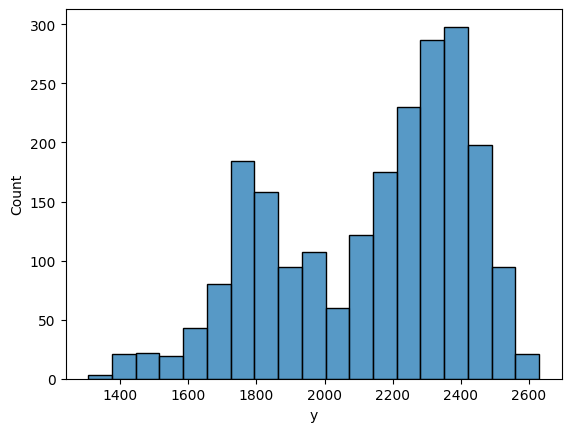

In [8]:
import seaborn as sns
sns.histplot(df.y)

In [9]:
# predicting wig20 based on its dendrogram part

m = NeuralProphet(
    n_lags = 50,
    n_forecasts = 10
)

for column_name in df_wig.columns[1:-1]:
  m = m.add_lagged_regressor(f"{column_name}")

df_train, df_test = m.split_df(df_wig, freq='D', valid_p = 1.0/12)

df_train, df_valid = m.split_df(df_train, freq='D', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='D', validation_df=df_valid)

forecast = m.predict(df_test)

display(m.plot(forecast))

test_metrics_global = m.test(df_test)
test_metrics_global

INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regresso

Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.72% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.728% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 94it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '7ec96ad4-e74a-4220-88db-893340bfd15d',
              'x': array([datetime.datetime(2022, 5, 17, 0, 0),
                          datetime.datetime(2022, 5, 18, 0, 0),
                          datetime.datetime(2022, 5, 19, 0, 0), ...,
                          datetime.datetime(2023, 5, 6, 0, 0),
                          datetime.datetime(2023, 5, 7, 0, 0),
                          datetime.datetime(2023, 5, 8, 0, 0)], dtype=object),
              'y': array([          nan,           nan,           nan, ..., 1856.08398438,
                          1903.34936523, 1878.29711914])},
             {'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 0.7714285714285714)', 'width': 2},
              'mode': 'lines',
              'nam

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.72% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.004217205569148064
         MAE_val             87.18682098388672
        RMSE_val             110.2847900390625
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


MAE_val   RMSE_val  Loss_test  RegLoss_test
0  87.186821  110.28479   0.004217           0.0

In [10]:
for i in range(1,11):
    column = "yhat" + str(i)
    print(f"MAPE for {i} future prediction :",mean_absolute_percentage_error(forecast.y[100:], forecast[column][100:]) * 100)

MAPE for 1 future prediction : 1.824438174694903
MAPE for 2 future prediction : 2.5675635409551694
MAPE for 3 future prediction : 3.8452587751168616
MAPE for 4 future prediction : 3.320395113852962
MAPE for 5 future prediction : 4.553900490503751
MAPE for 6 future prediction : 5.403688227960483
MAPE for 7 future prediction : 6.012959064990632
MAPE for 8 future prediction : 7.069929848050102
MAPE for 9 future prediction : 8.163186300357724
MAPE for 10 future prediction : 9.790492095067677


In [11]:
# wig20 but with all features

m = NeuralProphet(
    n_lags = 50,
    n_forecasts = 10
)

for column_name in df.columns[1:-1]:
  m = m.add_lagged_regressor(f"{column_name}")

df_train, df_test = m.split_df(df, freq='D', valid_p = 1.0/12)

df_train, df_valid = m.split_df(df_train, freq='D', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='D', validation_df=df_valid)

forecast = m.predict(df_test)

display(m.plot(forecast))

test_metrics_global = m.test(df_test)
test_metrics_global

INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regresso

INFO - (NP.data.processing._handle_missing_data_single_id) - 1435 NaN values in column NATGAS_d were auto-imputed.
WARNING - (NP.data.processing._handle_missing_data_single_id) - 1435 missing values in column NIKKEI_d were detected in total. 
INFO - (NP.data.processing._handle_missing_data_single_id) - 1435 NaN values in column NIKKEI_d were auto-imputed.
WARNING - (NP.data.processing._handle_missing_data_single_id) - 1435 missing values in column OILBRENT_d were detected in total. 
INFO - (NP.data.processing._handle_missing_data_single_id) - 1435 NaN values in column OILBRENT_d were auto-imputed.
WARNING - (NP.data.processing._handle_missing_data_single_id) - 1435 missing values in column PALLADIUM_d were detected in total. 
INFO - (NP.data.processing._handle_missing_data_single_id) - 1435 NaN values in column PALLADIUM_d were auto-imputed.
WARNING - (NP.data.processing._handle_missing_data_single_id) - 1435 missing values in column POLAND10B_d were detected in total. 
INFO - (NP.data

Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.72% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.728% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 94it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'eaeec548-343e-45d2-9c4a-f92816a0b55e',
              'x': array([datetime.datetime(2022, 5, 17, 0, 0),
                          datetime.datetime(2022, 5, 18, 0, 0),
                          datetime.datetime(2022, 5, 19, 0, 0), ...,
                          datetime.datetime(2023, 5, 6, 0, 0),
                          datetime.datetime(2023, 5, 7, 0, 0),
                          datetime.datetime(2023, 5, 8, 0, 0)], dtype=object),
              'y': array([          nan,           nan,           nan, ..., 1902.12915039,
                          1945.02563477, 1983.84643555])},
             {'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 0.7714285714285714)', 'width': 2},
              'mode': 'lines',
              'nam

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.72% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.005086029414087534
         MAE_val             94.76663208007812
        RMSE_val             121.113525390625
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


MAE_val    RMSE_val  Loss_test  RegLoss_test
0  94.766632  121.113525   0.005086           0.0

In [12]:
for i in range(1,11):
    column = "yhat" + str(i)
    print(f"MAPE for {i} future prediction :",mean_absolute_percentage_error(forecast.y[100:], forecast[column][100:]) * 100)

MAPE for 1 future prediction : 2.2839422121157438
MAPE for 2 future prediction : 3.0871994613986784
MAPE for 3 future prediction : 6.643688420545095
MAPE for 4 future prediction : 3.9808836566813914
MAPE for 5 future prediction : 4.802544920407089
MAPE for 6 future prediction : 7.666020699182967
MAPE for 7 future prediction : 6.723143597017048
MAPE for 8 future prediction : 6.042068121377966
MAPE for 9 future prediction : 8.682848890159512
MAPE for 10 future prediction : 7.904188434672799


In [13]:
# wig20 all features but n_lags = 20

m = NeuralProphet(
    n_lags = 20,
    n_forecasts = 10
)

for column_name in df.columns[1:-1]:
  m = m.add_lagged_regressor(f"{column_name}")

df_train, df_test = m.split_df(df, freq='D', valid_p = 1.0/12)

df_train, df_valid = m.split_df(df_train, freq='D', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='D', validation_df=df_valid)

forecast = m.predict(df_test)

display(m.plot(forecast))

test_metrics_global = m.test(df_test)
test_metrics_global

INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (20)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (20)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (20)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (20)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (20)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (20)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (20)
INFO - (NP.forecaster.add_lagged_regresso

INFO - (NP.data.processing._handle_missing_data_single_id) - 1435 NaN values in column NATGAS_d were auto-imputed.
WARNING - (NP.data.processing._handle_missing_data_single_id) - 1435 missing values in column NIKKEI_d were detected in total. 
INFO - (NP.data.processing._handle_missing_data_single_id) - 1435 NaN values in column NIKKEI_d were auto-imputed.
WARNING - (NP.data.processing._handle_missing_data_single_id) - 1435 missing values in column OILBRENT_d were detected in total. 
INFO - (NP.data.processing._handle_missing_data_single_id) - 1435 NaN values in column OILBRENT_d were auto-imputed.
WARNING - (NP.data.processing._handle_missing_data_single_id) - 1435 missing values in column PALLADIUM_d were detected in total. 
INFO - (NP.data.processing._handle_missing_data_single_id) - 1435 NaN values in column PALLADIUM_d were auto-imputed.
WARNING - (NP.data.processing._handle_missing_data_single_id) - 1435 missing values in column POLAND10B_d were detected in total. 
INFO - (NP.data

Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.697% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.706% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 95it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'f5b8fb29-25db-4d0e-9d27-1fdad2b813a0',
              'x': array([datetime.datetime(2022, 6, 13, 0, 0),
                          datetime.datetime(2022, 6, 14, 0, 0),
                          datetime.datetime(2022, 6, 15, 0, 0), ...,
                          datetime.datetime(2023, 5, 6, 0, 0),
                          datetime.datetime(2023, 5, 7, 0, 0),
                          datetime.datetime(2023, 5, 8, 0, 0)], dtype=object),
              'y': array([          nan,           nan,           nan, ..., 2093.38891602,
                          2166.80126953, 2122.22216797])},
             {'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 0.7714285714285714)', 'width': 2},
              'mode': 'lines',
              'nam

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.697% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.014932310208678246
         MAE_val            177.93882751464844
        RMSE_val            207.53196716308594
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


MAE_val    RMSE_val  Loss_test  RegLoss_test
0  177.938828  207.531967   0.014932           0.0

In [14]:
for i in range(1,11):
    column = "yhat" + str(i)
    print(f"MAPE for {i} future prediction :",mean_absolute_percentage_error(forecast.y[100:], forecast[column][100:]) * 100)

MAPE for 1 future prediction : 12.946427061779502
MAPE for 2 future prediction : 6.670512280064714
MAPE for 3 future prediction : 10.019170044885044
MAPE for 4 future prediction : 8.081187885641285
MAPE for 5 future prediction : 16.002166362880534
MAPE for 6 future prediction : 7.200562939914324
MAPE for 7 future prediction : 7.381772653765482
MAPE for 8 future prediction : 16.734336397114266
MAPE for 9 future prediction : 3.7837067770975557
MAPE for 10 future prediction : 8.17220663861237


In [27]:
# predicting sp500 based on its dendrogram part

m = NeuralProphet(
    n_lags = 50,
    n_forecasts = 10
)

for column_name in df_sp.columns[1:-1]:
  m = m.add_lagged_regressor(f"{column_name}")

df_train, df_test = m.split_df(df_sp, freq='D', valid_p = 1.0/12)

df_train, df_valid = m.split_df(df_train, freq='D', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='D', validation_df=df_valid)

forecast = m.predict(df_test)

display(m.plot(forecast))

test_metrics_global = m.test(df_test)
test_metrics_global

INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (50)
INFO - (NP.forecaster.add_lagged_regresso

Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.72% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.728% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 94it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '69baf132-d69f-490d-82de-5c05b92a2b55',
              'x': array([datetime.datetime(2022, 5, 17, 0, 0),
                          datetime.datetime(2022, 5, 18, 0, 0),
                          datetime.datetime(2022, 5, 19, 0, 0), ...,
                          datetime.datetime(2023, 5, 6, 0, 0),
                          datetime.datetime(2023, 5, 7, 0, 0),
                          datetime.datetime(2023, 5, 8, 0, 0)], dtype=object),
              'y': array([          nan,           nan,           nan, ..., 4176.12792969,
                          4132.1875    , 4161.68359375])},
             {'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 0.7714285714285714)', 'width': 2},
              'mode': 'lines',
              'nam

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.72% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.0009942447068169713
         MAE_val             91.61751556396484
        RMSE_val            115.52760314941406
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


MAE_val    RMSE_val  Loss_test  RegLoss_test
0  91.617516  115.527603   0.000994           0.0

In [28]:
for i in range(1,11):
    column = "yhat" + str(i)
    print(f"MAPE for {i} future prediction :",mean_absolute_percentage_error(forecast.y[100:], forecast[column][100:]) * 100)

MAPE for 1 future prediction : 1.4371948542099091
MAPE for 2 future prediction : 1.537935689019889
MAPE for 3 future prediction : 1.9483600774596983
MAPE for 4 future prediction : 2.243825840950191
MAPE for 5 future prediction : 2.195847803136399
MAPE for 6 future prediction : 2.664015158181108
MAPE for 7 future prediction : 2.1893698336771967
MAPE for 8 future prediction : 2.569131714472089
MAPE for 9 future prediction : 3.0008898632849053
MAPE for 10 future prediction : 2.6509138706169164


In [15]:
# TODO
m = NeuralProphet(
    n_lags = 50,
    n_forecasts = 10
)

for column_name in df.columns[1:-1]:
  m = m.add_future_regressor(f"{column_name}")

df_train, df_test = m.split_df(df, freq='D', valid_p = 1.0/12)

df_train, df_valid = m.split_df(df_train, freq='D', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='D', validation_df=df_valid)

forecast = m.predict(df_test)

display(m.plot(forecast))

test_metrics_global = m.test(df_test)
test_metrics_global

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 87.286% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.data.processing._handle_missing_data_single_id) - 1435 missing dates added.
WARNING - (NP.data.processing._handle_missing_data_single_id) - 1435 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data_single_id) - 1435 NaN values in column y were auto-imputed.
WARNING - (NP.data.processing._handle_missing_data_single_id) - 1435 missing values in column COPPER_d were detected in total. 
INFO - (NP.data.processing._handle_missing_data_single_id) - 1435 NaN values in column COPPER_d were auto-imputed.
WARNING - (NP.data.processing._handle_missing_data_single_id) - 1435 missing values in column DAX_d were detected in total. 
INFO - (NP.data.processing._handle_missing_data_single_id) - 1435 NaN values in column DAX_d were auto-imputed.
WARNING - (NP.data.p

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.967% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (94) is too small than the required number for the learning rate finder (237). The results might not be optimal.


Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.72% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.72% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 94it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'b738ee71-f480-4d37-8165-9f628029327a',
              'x': array([datetime.datetime(2022, 5, 17, 0, 0),
                          datetime.datetime(2022, 5, 18, 0, 0),
                          datetime.datetime(2022, 5, 19, 0, 0), ...,
                          datetime.datetime(2023, 5, 6, 0, 0),
                          datetime.datetime(2023, 5, 7, 0, 0),
                          datetime.datetime(2023, 5, 8, 0, 0)], dtype=object),
              'y': array([nan, nan, nan, ..., nan, nan, nan])},
             {'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 0.7714285714285714)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat2',
              'type': 'scatter',
              'uid': 'f3eefca1-6a5b-48a6

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.72% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.0006181857315823436
         MAE_val            32.674461364746094
        RMSE_val            42.224327087402344
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


MAE_val   RMSE_val  Loss_test  RegLoss_test
0  32.674461  42.224327   0.000618           0.0

In [22]:
forecast.yhat10.isna().sum()

59

In [16]:
for i in range(1,11):
    column = "yhat" + str(i)
    print(f"MAPE for {i} future prediction :",mean_absolute_percentage_error(forecast.y[100:], forecast[column][100:]) * 100)

ValueError: Input contains NaN.

In [ ]:
m = NeuralProphet(
    n_lags = 50,
    n_forecasts = 10
)

for column_name in df_wig.columns[1:-1]:
  m = m.add_future_regressor(f"{column_name}")

df_train, df_test = m.split_df(df_wig, freq='D', valid_p = 1.0/12)

df_train, df_valid = m.split_df(df_train, freq='D', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='D', validation_df=df_valid)

forecast = m.predict(df_test)

display(m.plot(forecast))

test_metrics_global = m.test(df_test)
test_metrics_global

In [ ]:
for i in range(1,11):
    column = "yhat" + str(i)
    print(f"MAPE for {i} future prediction :",mean_absolute_percentage_error(forecast.y[100:], forecast[column][100:]) * 100)